In [768]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd

In [769]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [770]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

In [771]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [772]:
df["species"] = df["species"].replace("setosa", 0)
df["species"] = df["species"].replace("versicolor", 1)
df["species"] = df["species"].replace("virginica", 2)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [773]:
x = df.drop('species', axis=1)
y = df['species']

In [774]:
x = x.values
y = y.values

In [775]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y ,
                                   random_state=100,
                                   test_size=0.2,
                                   shuffle=True)

In [776]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [777]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [778]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [779]:
class Iris(nn.Module):
  def __init__(self, in_features = 4, h1=8, h2=9, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [780]:
torch.manual_seed(41)
model = Iris()

In [781]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)

In [782]:
epochs = 100
losses = []

for i in range(epochs):
  model.train()
  y_pred = model(x_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.item())
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
print(f'Final Loss: {loss.item()}')

Epoch: 0 and loss: 1.074371576309204
Epoch: 10 and loss: 0.8892280459403992
Epoch: 20 and loss: 0.642028272151947
Epoch: 30 and loss: 0.364427775144577
Epoch: 40 and loss: 0.2094382345676422
Epoch: 50 and loss: 0.12516970932483673
Epoch: 60 and loss: 0.08383829891681671
Epoch: 70 and loss: 0.0698099359869957
Epoch: 80 and loss: 0.06611651182174683
Epoch: 90 and loss: 0.06558407098054886
Final Loss: 0.06615705788135529


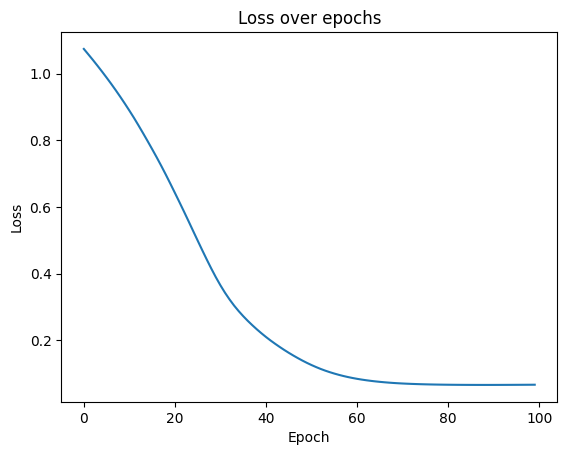

In [783]:
plt.plot(losses)
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [784]:
from sklearn.metrics import accuracy_score
with torch.no_grad():
    train_pred = model(x_train)
    train_acc = accuracy_score(y_train.numpy(), train_pred.argmax(dim=1).numpy())
    print(f'Training Accuracy: {train_acc:.4f}')

Training Accuracy: 0.9750


In [785]:
with torch.no_grad():
    test_pred = model(x_test)
    test_acc = accuracy_score(y_test.numpy(), test_pred.argmax(dim=1).numpy())
    print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.9667
